# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [109]:
from scipy import stats

In [110]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [111]:
#Seu código aqui
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB


In [112]:
df.dtypes

Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object

In [113]:
(df.isnull().sum() / len(df)) * 100

Valor_Aluguel       0.0
Valor_Condominio    0.0
Metragem            0.0
N_Quartos           0.0
N_banheiros         0.0
N_Suites            0.0
N_Vagas             0.0
dtype: float64

In [114]:
# Não há valores nulos no modelo

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [115]:
#Seu código aqui
# A)
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


In [116]:
# B)
z_scores = stats.zscore(df['Valor_Aluguel'])
outliers_z = df[z_scores >= 3]
print('Outliers Valor_Aluguel pelo Z-score: \n', outliers_z)

Outliers Valor_Aluguel pelo Z-score: 
       Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_banheiros  \
7001          12000              4174       236          4            5   
7002          12000              3000       390          4            5   
7003          12000              2100       102          2            3   
7004          12000                 0       271          4            4   
7005          12000              2700       161          3            4   
...             ...               ...       ...        ...          ...   
7198          25000              7500       627          4            5   
7199          25000              4600       364          4            2   
7200          25000              3700       266          3            4   
7201          25000              6000       600          4            5   
7202          25000              1587       248          4            3   

      N_Suites  N_Vagas  
7001         4        3  
7002    

In [117]:
z_scores = stats.zscore(df['Valor_Condominio'])
outliers_z = df[z_scores >= 3]
print('Outliers Valor_Condominio pelo Z-score: \n', outliers_z)

Outliers Valor_Condominio pelo Z-score: 
       Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_banheiros  \
3604           2000              4700       400          4            5   
3704           2000              3226       300          4            5   
3845           2000              5000       280          4            5   
4772           2666              3508       354          3            2   
4893           2800              6059        66          2            2   
...             ...               ...       ...        ...          ...   
7197          25000              5636       327          4            3   
7198          25000              7500       627          4            5   
7199          25000              4600       364          4            2   
7200          25000              3700       266          3            4   
7201          25000              6000       600          4            5   

      N_Suites  N_Vagas  
3604         4        4  
3704 

In [118]:
z_scores = stats.zscore(df['Metragem'])
outliers_z = df[z_scores >= 3]
print('Outliers Metragem pelo Z-score: \n', outliers_z)

Outliers Metragem pelo Z-score: 
       Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_banheiros  \
3604           2000              4700       400          4            5   
3704           2000              3226       300          4            5   
3845           2000              5000       280          4            5   
3889           2100               350       300          2            1   
4173           2300                 0       280          3            2   
...             ...               ...       ...        ...          ...   
7194          25000              4500       306          3            4   
7197          25000              5636       327          4            3   
7198          25000              7500       627          4            5   
7199          25000              4600       364          4            2   
7201          25000              6000       600          4            5   

      N_Suites  N_Vagas  
3604         4        4  
3704         

In [119]:
z_scores = stats.zscore(df['N_Quartos'])
outliers_z = df[z_scores >= 3]
print('Outliers N_Quartos pelo Z-score: \n', outliers_z)

Outliers N_Quartos pelo Z-score: 
       Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_banheiros  \
5830           4000               800       200          5            1   
6243           5000              2688       380          5            3   
6250           5000              1411       148          5            4   
6531           6000                 0       313          5            8   
6597           6500              1550       234          5            5   
6608           6500              1550       234          5            5   
6625           6700              2600       330          5            4   
6766           8000                 0       273         10            4   
6786           8000              4200       510          6            5   
6841           8700              5040       852          7            6   
6853           9000              4583       510          5            5   
7072          14000              1900       289          5       

In [120]:
z_scores = stats.zscore(df['N_banheiros'])
outliers_z = df[z_scores >= 3]
print('Outliers N_banheiros pelo Z-score: \n', outliers_z)

Outliers N_banheiros pelo Z-score: 
       Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_banheiros  \
4289           2400              1200       180          4            6   
5096           3000              7500       393          4            6   
5210           3000              1600       250          4            6   
5459           3400              1378       180          4            6   
5493           3500              1250       189          4            6   
5620           3500              1850       192          4            6   
5721           3700              1700       165          3            6   
5825           4000              1123       160          3            7   
6031           4500              3300       250          4            7   
6066           4500              2920       250          4            6   
6291           5000              2225       290          4            6   
6530           6000              5250       330          4     

In [121]:
z_scores = stats.zscore(df['N_Suites'])
outliers_z = df[z_scores >= 3]
print('Outliers N_Suites pelo Z-score: \n', outliers_z)

Outliers N_Suites pelo Z-score: 
       Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_banheiros  \
3604           2000              4700       400          4            5   
3704           2000              3226       300          4            5   
3845           2000              5000       280          4            5   
5096           3000              7500       393          4            6   
5387           3200              2000       280          4            5   
...             ...               ...       ...        ...          ...   
7192          23000              5600       364          4            5   
7193          24000              4710       364          4            6   
7196          25000              3320       222          4            5   
7198          25000              7500       627          4            5   
7201          25000              6000       600          4            5   

      N_Suites  N_Vagas  
3604         4        4  
3704         

In [122]:
z_scores = stats.zscore(df['N_Vagas'])
outliers_z = df[z_scores >= 3]
print('Outliers N_Vagas pelo Z-score: \n', outliers_z)

Outliers N_Vagas pelo Z-score: 
       Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_banheiros  \
3997           2200              1700       200          4            4   
5096           3000              7500       393          4            6   
6243           5000              2688       380          5            3   
6247           5000              2700       193          3            4   
6248           5000              1250       157          3            4   
6291           5000              2225       290          4            6   
6295           5000              2860       268          4            5   
6312           5000              2225       290          4            5   
6356           5500              3000       230          3            4   
6591           6500              4901       336          4            5   
6700           7500              3204       370          4            6   
6766           8000                 0       273         10         

In [123]:
# A questão dos outliers nessa base é sensível, visto que todas as variáveis possuem outliers. A maioria delas com pelo menos cem outliers.
# Contudo, não parece haver erros de digitação, pelo contrário:
# Ao observar algumas linhas observamos que apontam outliers em várias variáveis, como a linha 7201, que é identificada como outlier pelas seguintes colunas: Valor_Aluguel, Valor_Condominio, Metragem, N_Suites, N_Vagas.
# Não parece fazer sentido excluí-la, visto que, essa linha aponta para um valor acima da média em quase todas as variáveis.
# Esses outliers parecem fazer sentido, em apartamentos de luxo é esperado que o valor do aluguel seja maior e que outras variáveis como condomínio, metragem e número de suites também.
# De modo a não desconsiderar os apartamentos de luxo, não iremos excluir os outliers encontrados.

Text(0, 0.5, 'Valor do Aluguel')

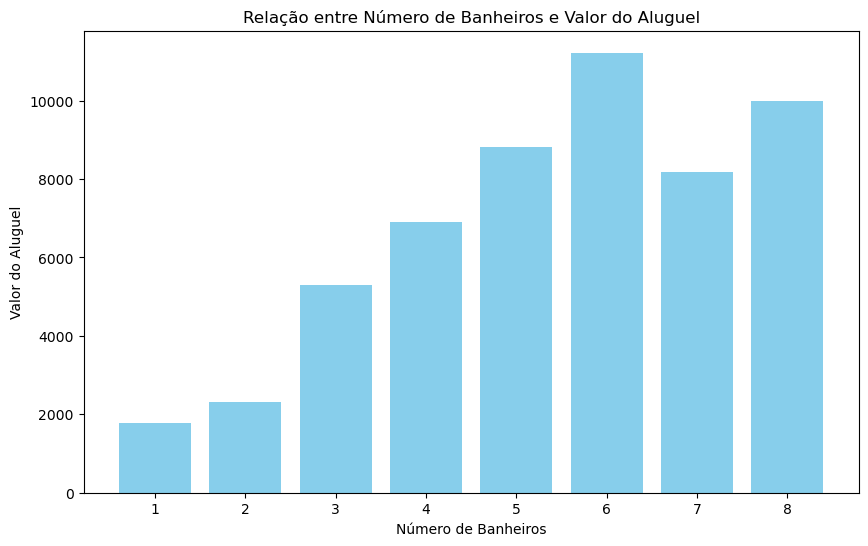

In [124]:
# C)
# Relação entre N_banheiros e Valor_Aluguel
media_aluguel_por_banheiro = df.groupby('N_banheiros')['Valor_Aluguel'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(media_aluguel_por_banheiro['N_banheiros'], media_aluguel_por_banheiro['Valor_Aluguel'], color='skyblue')
plt.title('Relação entre Número de Banheiros e Valor do Aluguel')
plt.xlabel('Número de Banheiros')
plt.ylabel('Valor do Aluguel')

# É possível observar uma relação positiva entre o número de banheiros e o valor médio do aluguel até o total de 6 banheiros. A partir desse ponto não há incremento adicional no valor do aluguel a cada aumento no número de banheiros.

Text(0, 0.5, 'Valor do Aluguel')

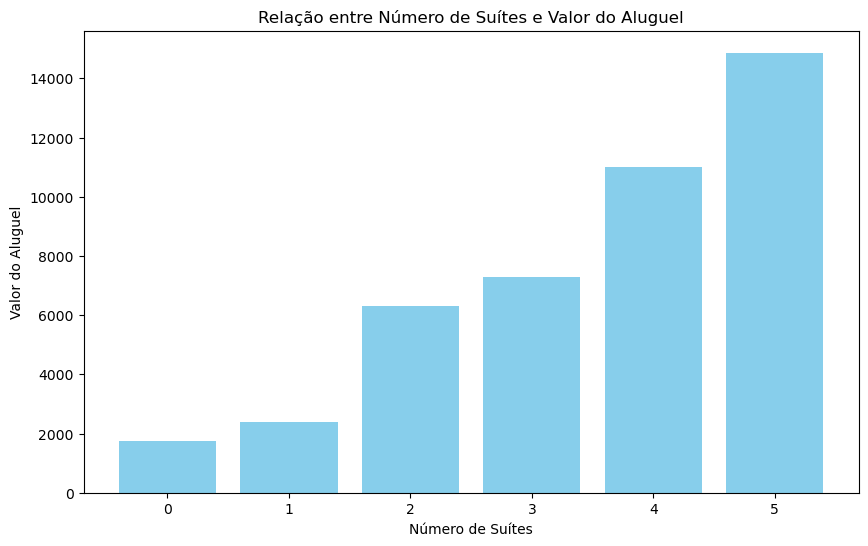

In [125]:
# Relação entre N_Suites e Valor_Aluguel
media_aluguel_por_suite = df.groupby('N_Suites')['Valor_Aluguel'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(media_aluguel_por_suite['N_Suites'], media_aluguel_por_suite['Valor_Aluguel'], color='skyblue')
plt.title('Relação entre Número de Suítes e Valor do Aluguel')
plt.xlabel('Número de Suítes')
plt.ylabel('Valor do Aluguel')

# É possível observar uma relação positiva entre o número de suítes e o valor médio do aluguel.

Text(0, 0.5, 'Valor do Aluguel')

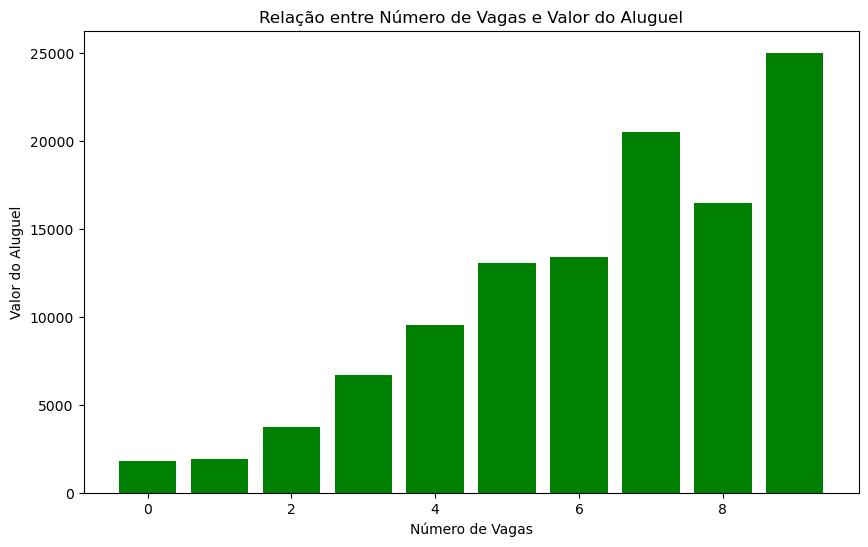

In [126]:
# Relação entre N_Vagas e Valor_Aluguel
media_aluguel_por_vaga = df.groupby('N_Vagas')['Valor_Aluguel'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(media_aluguel_por_vaga['N_Vagas'], media_aluguel_por_vaga['Valor_Aluguel'], color='green')
plt.title('Relação entre Número de Vagas e Valor do Aluguel')
plt.xlabel('Número de Vagas')
plt.ylabel('Valor do Aluguel')

# Em relação ao número de vagas temos um cenário similar ao número de suítes, quanto mais vagas, maior tende a ser o valor do alguel.

# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




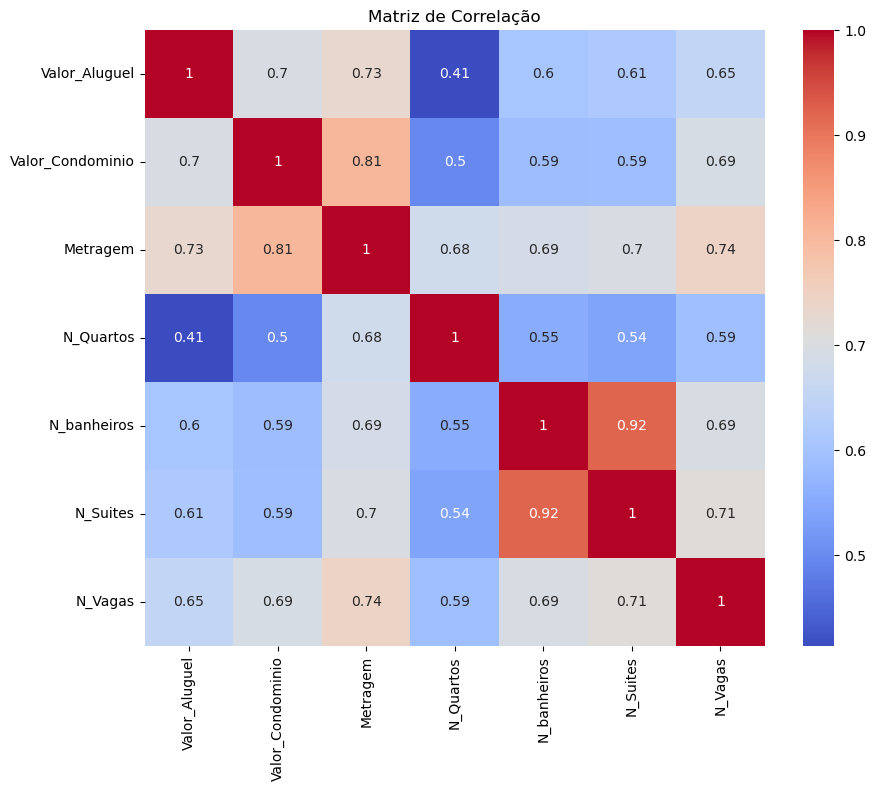

In [127]:
#Seu código aqui
correlacao = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Todas as demais variáveis parecem estar positivamente correlacionadas com o valor do aluguel.
# As três mais "fortes" são: Metragem, Valor_Condominio e N_Vagas.


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [128]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [129]:
# Seu código aqui
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [130]:
X_train

,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
6931,1350,176,3,4,3,3
4125,680,70,1,1,0,2
6079,650,66,2,1,0,1
5044,655,68,3,2,1,1
2299,330,33,1,1,0,1
...,...,...,...,...,...,...
3772,450,48,2,2,1,1
5191,570,34,1,1,0,1
5226,976,95,2,2,1,1
5390,550,74,3,3,1,2


In [131]:
X_test

,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
3885,484,50,2,1,0,1
4661,680,50,2,1,0,1
1038,0,58,2,2,1,1
5867,1226,127,3,1,0,2
5099,697,90,4,3,1,2
...,...,...,...,...,...,...
4689,1250,160,3,3,1,2
5313,530,43,1,2,1,1
5624,1250,147,4,4,2,3
4647,650,53,2,1,0,1


In [132]:
y_train

6931    10000
4125     2200
6079     4500
5044     2900
2299     1500
        ...  
3772     2000
5191     3000
5226     3000
5390     3200
860      1100
Name: Valor_Aluguel, Length: 5402, dtype: int64

In [133]:
y_test

3885    2100
4661    2500
1038    1200
5867    4000
5099    3000
        ... 
4689    2550
5313    3100
5624    3500
4647    2500
4453    2500
Name: Valor_Aluguel, Length: 1801, dtype: int64

# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linear simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [134]:
X_train_simples = X_train[['Metragem']]  # Variável independente (características)
y_train_simples = y_train  # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

In [135]:
#Crie seu modelo aqui, usando LinearRegression e as bases de treino.
regressao_valor_aluguel = LinearRegression()

regressao_valor_aluguel.fit(X_train_simples,y_train_simples)

LinearRegression()

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [136]:
#Seu código Aqui
regressao_valor_aluguel.intercept_

-103.17820863080306

In [137]:
regressao_valor_aluguel.coef_

array([34.70818769])

Nossa equação seria: Valor_Aluguel= -103,17 + 34,7*(Metragem) 

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [138]:
#Seu código aqui
regressao_valor_aluguel.score(X_train_simples,y_train_simples)

0.5213271756253639

In [139]:
# Um coeficiente de determinação R2 de 0.521 indica que aproximadamente 52,1% da variação no valor do aluguel é explicada pela metragem.

# O resultado indica que o modelo tem um poder explicativo moderado, possivelmente adicionando outras variáveis o modelo seria mais acertivo.

D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

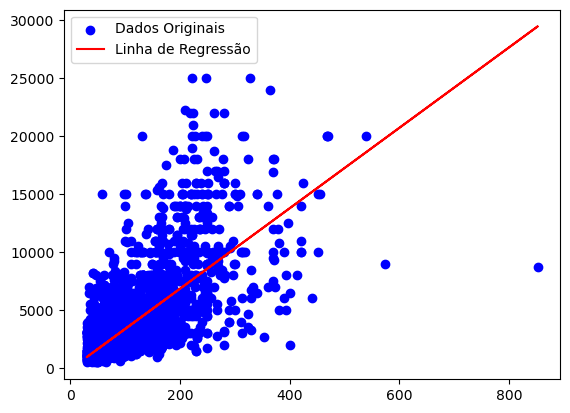

In [140]:
# Seu código aqui
plt.scatter(X_train_simples, y_train_simples, color='blue', label='Dados Originais')
plt.plot(X_train_simples, regressao_valor_aluguel.predict(X_train_simples), color='red', label='Linha de Regressão')
plt.legend()
plt.show()

# # Esse gráfico traz dois insights importantes:
# 1- Os dados estão distribuídos majoritariamente entre metragens de 0 a 200 metros e o valor do aluguel até 10.000.
# 2- Há uma tendência positiva entre a metragem e o valor do aluguel.

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [141]:
X_test_simples = X_test[['Metragem']]  # Variável independente (características)
y_test_simples = y_test  # Variável dependente (rótulo)

In [142]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = regressao_valor_aluguel.predict(X_test_simples)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = regressao_valor_aluguel.score(X_test_simples, y_test_simples)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)


Coeficiente de Determinação (R²) nos Dados de Teste: 0.5651600449476675


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

O R² encontrado no treinamento (0,52) é levemente inferior ao do teste (0,56), isso pode indicar que o modelo está subajustado. É possível que o modelo não esteja se ajustando aos padrões nos dados de treinamento e não esteja capturando adequadamente a relação entre a metragem e o valor do aluguel.

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [143]:
X_train_mult = X_train[['Valor_Condominio', 'Metragem', 'N_Quartos', 'N_banheiros', 'N_Suites', 'N_Vagas']]
y_train_mult = y_train

B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [144]:
#seu código aqui
regressao_multipla = LinearRegression()
regressao_multipla.fit(X_train_mult,y_train_mult)

LinearRegression()

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [145]:
#seu código aqui
regressao_multipla.score(X_train_mult,y_train_mult)

0.5971610197647366

D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [146]:
#seu código aqui
X_test_mult = X_test[['Metragem', 'Valor_Condominio', 'N_Quartos', 'N_banheiros', 'N_Suites', 'N_Vagas']]  # Variável independente (características)
y_test_mult = y_test  # Variável dependente (rótulo)


In [148]:
regressao_multipla = LinearRegression()
regressao_multipla.fit(X_test_mult,y_test_mult)

LinearRegression()

In [151]:
regressao_multipla.score(X_test_mult,y_test_mult)

0.6375971027023317

E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

Novamente o R² encontrando no teste foi superior ao encontrado no treino. O que também pode indicar que o modelo está subajustado, conforme explicado na regressão simples.
O modelo de regressão múltipla parece ser melhor do que o simples, visto que o R² encontrado é superior. Um dos motivos para isso acontecer pode ser o alto nível de correlação que as demais variáveis também tem como o valor do aluguel, conforme observado na matriz de correlação.